# GPGN268 - Geophysical Data Analysis
## Data Story 00 - Denver Meteorological Data
**Student:** Lucas Holt

## Task 1
### Visualizing raw data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
precip = np.loadtxt(fname='../data/meteo_denver_precip_2000_2022.txt', delimiter='\t')
precip.shape

(23, 12)

In [3]:
cbar_theme = 'Blues'
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
year_labels = list(range(2000,2023))

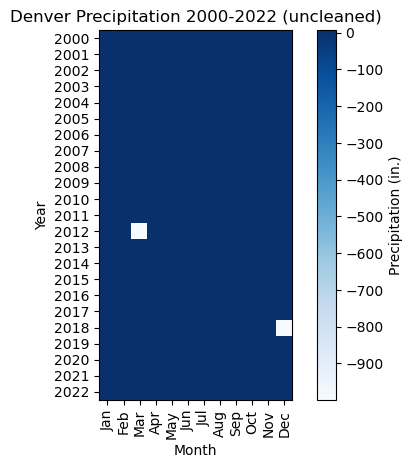

In [4]:
plt.imshow(precip, cmap=cbar_theme)

cbar = plt.colorbar(ticks=range(0,-1000,-100))
cbar.set_label('Precipitation (in.)')

plt.title('Denver Precipitation 2000-2022 (uncleaned)')
plt.xticks(range(0,12), labels=month_labels, rotation='vertical')
plt.yticks(range(0,23), labels=year_labels)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

This data set has several bad data points (the light squares on the heat map above). The values associated with these squares are -999 and there appear to be only two.

In [5]:
# Create precip_clean - a cleaned data set with np.nan in place of -999
precip_clean = precip
bad = (precip_clean == -999)
precip_clean[bad] = np.nan

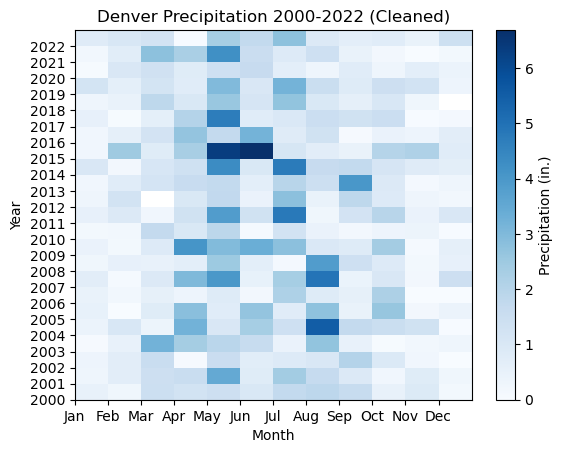

In [6]:
plt.pcolormesh(precip_clean, cmap=cbar_theme)

cbar_clean = plt.colorbar()
cbar_clean.set_label('Precipitation (in.)')

plt.title('Denver Precipitation 2000-2022 (Cleaned)')
plt.xticks(range(0,12), labels=month_labels)
plt.yticks(range(0,23), labels=year_labels)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

From this figure, it doesn't look like Denver gets a lot of precipitation throughout the year. Most months had fewer than 2 inches of precipitation. May and June of 2015 seem to be the times with the highest precipitation. In general, I'd say May is the month with the highest precipitation.

## Task 2
### Visualizing distributions

In [7]:
hist_labels = [x * 0.5 for x in range(0,15)]

Text(0.5, 1.0, 'Frequency of Precipitation Amounts, Denver, 2000-2022')

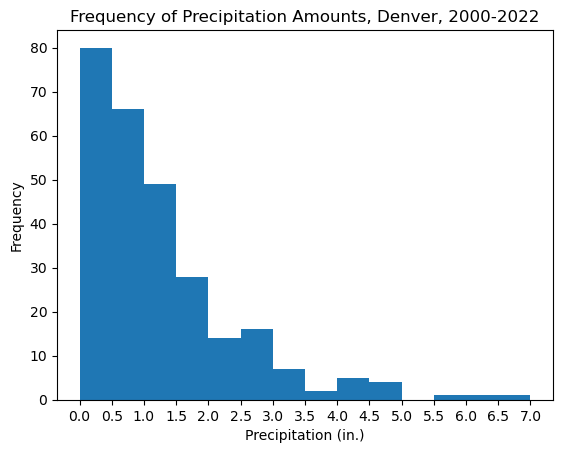

In [8]:
plt.hist(precip_clean.flatten(), bins=14, range=(0,7))
plt.xticks(hist_labels)
plt.xlabel('Precipitation (in.)')
plt.ylabel('Frequency')
plt.title('Frequency of Precipitation Amounts, Denver, 2000-2022')

This distribution is noticeably skew-right, which doesn't surprise me. I expected precipitation for Denver to be mostly on the low end. The max temperature distribution was different in that it was bimodal while this is unimodal.

I think the precipitation data could be reflected by an exponential decay distribution because it is highest at 0 and decreases rapidly moving on (as a generalization).

## Task 3
### Monthly average

In [9]:
month = np.arange(1, 13)
precip_mean = np.nanmean(precip_clean)

In [10]:
precip_monthly_mean = np.nanmean(precip_clean, axis=0)
precip_monthly_std = np.nanstd(precip_clean, axis=0)
precip_upper = precip_monthly_mean + precip_monthly_std
precip_lower = precip_monthly_mean - precip_monthly_std

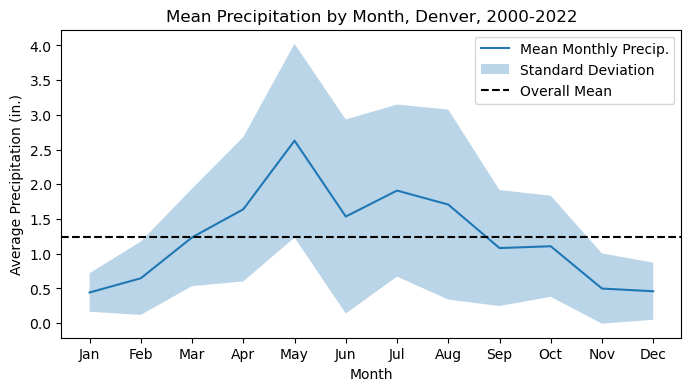

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(month, precip_monthly_mean, label='Mean Monthly Precip.')
ax.fill_between(month, precip_lower, precip_upper, alpha=0.3, label='Standard Deviation')
ax.set_xticks(month, labels=month_labels)
ax.set_xlabel('Month')
ax.set_ylabel('Average Precipitation (in.)')
ax.set_title('Mean Precipitation by Month, Denver, 2000-2022')
ax.axhline(y=precip_mean, ls='--', color='k', label='Overall Mean')
plt.legend()

This plot shows that, like maximum temperature, precipitation increases moving toward the middle of the year, and decreases during the end of the year. It also shows that May is the month with the most precipitation.

## Task 4
### Yearly average

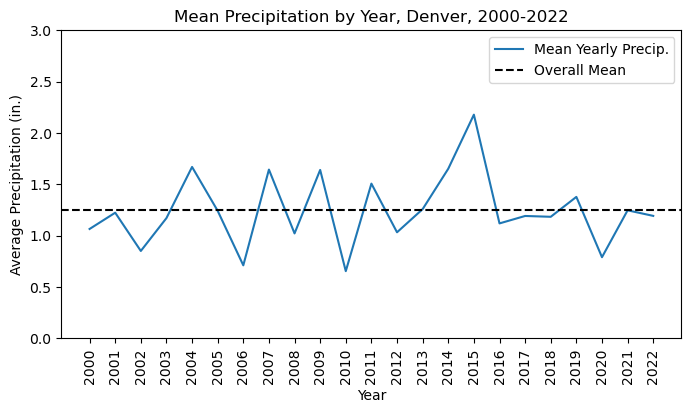

In [12]:
precip_yearly_mean = np.nanmean(precip_clean, axis=1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(year_labels, precip_yearly_mean, label = 'Mean Yearly Precip.')
ax.set_xticks(year_labels, labels=year_labels, rotation='vertical')
ax.set_xlabel('Year')
ax.set_ylabel('Average Precipitation (in.)')
ax.set_ylim([0.0, 3.0])
ax.set_title('Mean Precipitation by Year, Denver, 2000-2022')
ax.axhline(y=precip_mean, ls='--', color='k', label='Overall Mean')
plt.legend()

The yearly average for precipiation fluctuates often, like the yearly average maximum temperature. This plot shows that 2015 was the year with the most precipitation, and 2010 and 2006 had the least. Fluctuations are significantly reduced between 2016 and 2019.

## Task 5
### Identifying extremes

In [13]:
highest_precip_year = np.argmax(precip_yearly_mean)
lowest_precip_year = np.argmin(precip_yearly_mean)
max_location = (year_labels[highest_precip_year], np.max(precip_yearly_mean))
min_location = (year_labels[lowest_precip_year], np.min(precip_yearly_mean))

In [14]:
from matplotlib.patches import Circle
radius = 0.2
max_circle = Circle(max_location, radius, color='r', label='Maximum')
min_circle = Circle(min_location, radius, color='b', label='Minimum')

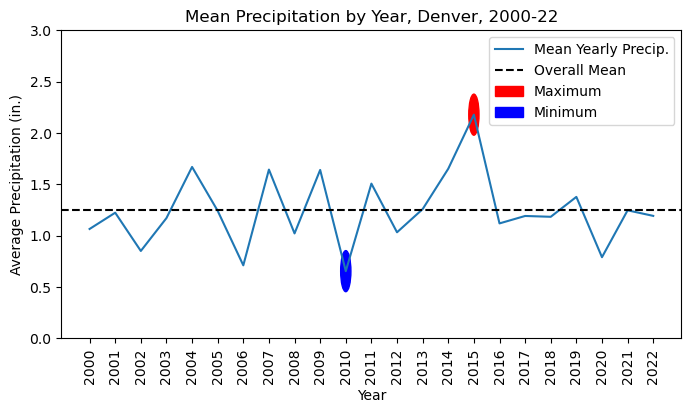

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(year_labels, precip_yearly_mean, label = 'Mean Yearly Precip.')
ax.set_xticks(year_labels, labels=year_labels, rotation='vertical')
ax.set_xlabel('Year')
ax.set_ylabel('Average Precipitation (in.)')
ax.set_ylim([0.0, 3.0])
ax.set_title('Mean Precipitation by Year, Denver, 2000-22')
ax.axhline(y=precip_mean, ls='--', color='k', label='Overall Mean')
ax.add_patch(max_circle)
ax.add_patch(min_circle)
plt.legend()